In [ ]:
import gdown
import zipfile
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
directory_data = '/content/drive/MyDrive/Dataset Capstone Project/Train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   rotation_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

valid_datagen = ImageDataGenerator(rescale = 1.0 / 255.0,
                                   rotation_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split = 0.2)

In [ ]:
#Mendefinisikan data train
train_dataset  = train_datagen.flow_from_directory(directory =directory_data,
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 10,
                                                   subset = 'training')

Found 3079 images belonging to 11 classes.


In [ ]:
valid_dataset = valid_datagen.flow_from_directory(directory = directory_data,
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  shuffle = False,
                                                  batch_size = 10,
                                                  subset = 'validation')

Found 766 images belonging to 11 classes.


In [ ]:
train_dataset.class_indices

{'Basa_Cell_Carcinoma': 0,
 'Eksim': 1,
 'Flek_Hitam': 2,
 'Herpes': 3,
 'Jerawat': 4,
 'Kerutan': 5,
 'Mata_Panda': 6,
 'Milia': 7,
 'Rosacea': 8,
 'Vitiligo': 9,
 'actinic_keratosis': 10}

In [ ]:
#Melakukan transfer learning menggunakan model pretrained MobileNetV2
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf

pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[224, 224, 3], include_top=False, weights="imagenet")
#Membekukan bobot dari layer pretrained model
pretrained_model.trainable = False

In [ ]:
#Arsitektur model VGG16
pretrained_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
model = tf.keras.Sequential()
model.add(pretrained_model)#(ini transfer learningnya pake model MobileNetV2. Gambar yg masuk 224x223x3)
#Ini layer tambahan yang aku buat sendiri
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(16,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

In [ ]:
#Menambahkan optimiser untuk mengurangi loss
OPT = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=OPT)

In [ ]:
model_history10=model.fit(train_dataset,
                        validation_data=valid_dataset,
                        epochs = 50,
                        verbose = 1)

Epoch 1/50
308/308 [==============================] - 78s 252ms/step - loss: 0.6241 - accuracy: 0.7788 - val_loss: 1.2916 - val_accuracy: 0.6554
Epoch 2/50
308/308 [==============================] - 71s 231ms/step - loss: 0.5783 - accuracy: 0.8038 - val_loss: 1.2893 - val_accuracy: 0.6619
Epoch 3/50
308/308 [==============================] - 70s 229ms/step - loss: 0.5586 - accuracy: 0.8045 - val_loss: 1.4322 - val_accuracy: 0.6606
Epoch 4/50
308/308 [==============================] - 71s 230ms/step - loss: 0.5655 - accuracy: 0.8113 - val_loss: 1.4291 - val_accuracy: 0.6488
Epoch 5/50
308/308 [==============================] - 76s 248ms/step - loss: 0.5473 - accuracy: 0.8204 - val_loss: 1.3723 - val_accuracy: 0.6632
Epoch 6/50
308/308 [==============================] - 72s 233ms/step - loss: 0.5330 - accuracy: 0.8210 - val_loss: 1.4383 - val_accuracy: 0.6619
Epoch 7/50
308/308 [==============================] - 71s 231ms/step - loss: 0.5022 - accuracy: 0.8321 - val_loss: 1.4374 - val_ac

In [ ]:
loss, acc = model.evaluate(train_dataset, verbose=1)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

308/308 [==============================] - 56s 181ms/step - loss: 0.0146 - accuracy: 0.9971
Restored model, accuracy: 99.71%


1/1 [==============================] - 2s 2s/step
Gambar ini diprediksi sebagai: Kerutan


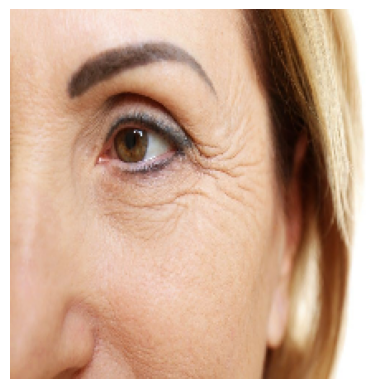

In [ ]:
from pylab import *
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import cv2
# Fungsi untuk melakukan prediksi gambar
def predict_image(model, image_path, class_labels):
    img = load_img(image_path, target_size=(224, 224))  # Ganti ukuran target sesuai dengan model Anda
    img = img_to_array(img)
    img = img / 255  # Normalisasi
    imshow(img)
    plt.axis('off')
    img = np.expand_dims(img, axis=0)

    predictions = model.predict(img)
    predicted_class_index = np.argmax(predictions)
    predicted_class = class_labels[predicted_class_index]

    return predicted_class

# Daftar nama kelas
class_labels = ['Basa_Cell_Carcinoma', 'Eksim', 'Flek_Hitam','Herpes','Jerawat','Kerutan','Mata_Panda','Milia','Rosacea','Vitiligo','actinic_keratosis',]

# Input gambar dari pengguna
image_path = '/content/drive/MyDrive/image.jpg'

# Melakukan prediksi
predicted_class = predict_image(model, image_path, class_labels)
print("Gambar ini diprediksi sebagai:", predicted_class)

In [ ]:
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download("model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>